# EDA: CO2 Emissions and Bicycle Market Analysis

## 1️⃣ Python 🐍 - CO2 Emissions



## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [2]:
# Look at the first ten items in the CO2 emissions array
cars_co2_emissions[:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212])

## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

1. What is the median engine size in liters?

The median engine size in liters is 3.

In [3]:
# Checking the median engine size
median_engine = cars['Engine Size(L)'].median()
median_engine

3.0

2. What is the average fuel consumption for regular gasoline (Fuel Type= X), premium gasoline (Z), ethanol (E), and diesel (D)?

The average fuel consumption, in liters per 100 km, for each of these fuel types is:

- Diesel (D) = 8.84 L/100 km
- Regular gasoline (X) = 10.08 L/100 km
- Premium gasoline (Z) = 11.42 L/100 km
- Ethanol (E) = 16.86 L/100 km

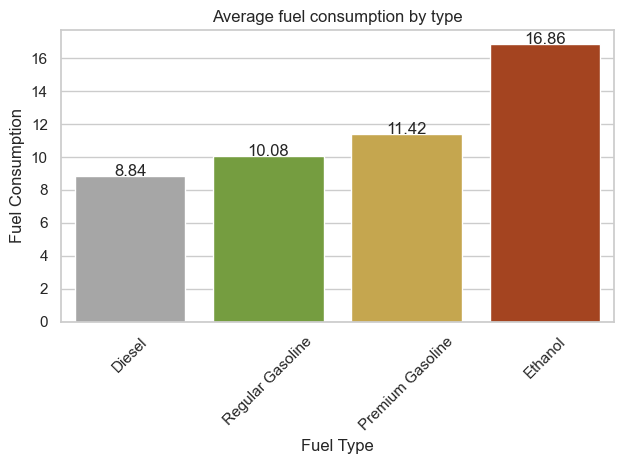

In [4]:
# Define a dictionary to map the fuel type codes to their names
fuel_type_names = {'X': 'Regular Gasoline', 'Z': 'Premium Gasoline', 'E': 'Ethanol', 'D': 'Diesel', 'N': 'Natural Gas'}

# Create a color palette
palette = {'X': '#77AC30', 'Z': '#D9AF3B', 'E': '#BA3A0A', 'D': '#A6A6A6'}

# Checking average fuel consumption by type, excluding natural gas (N).
avg_fuel_consumption = cars.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean().drop('N').sort_values()

# Plotting the average fuel consumption
sns.set(style="whitegrid")
ax = sns.barplot(x=avg_fuel_consumption.index, y=avg_fuel_consumption, palette=palette)

# Add data labels to the bars with the updated fuel type names
for i, v in enumerate(avg_fuel_consumption):
    fuel_type = fuel_type_names.get(avg_fuel_consumption.index[i], 'Unknown')
    ax.text(i, v, "{:.2f}".format(v), ha='center', fontweight='light')

# Title and labels
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption')
plt.title('Average fuel consumption by type')
plt.xticks(range(len(avg_fuel_consumption.index)), [fuel_type_names.get(fuel_type, 'Unknown') for fuel_type in avg_fuel_consumption.index], rotation=45)

plt.tight_layout()
plt.show()

3. What is the correlation between fuel consumption and CO2 emissions?

The correlation between fuel consumption and CO2 emissions is strong and positive, with a correlation coefficient of approximately 0.918. This indicates that as the fuel consumption increases, so does the CO2 emissions. The coefficient is close to +1, suggesting a strong linear relationship between the variables.

In [5]:
# Checking correlation between the two variables
corr = cars['Fuel Consumption Comb (L/100 km)'].corr(cars['CO2 Emissions(g/km)'])
corr

0.9180515723870847

4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

According to the following analysis, the 'MID-SIZE' vehicle class has a lower average CO2 emission of 222.46 g/km compared to 'SUV - SMALL' which has an average CO2 emission of 236.29 g/km. 

In [6]:
# Grouping by Vehicle Class and then by 'SUV - SMALL' and 'MID-SIZE'
emissions_comparison = cars.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
emissions_comparison[emissions_comparison.index.isin(['SUV - SMALL', 'MID-SIZE'])]

Vehicle Class
MID-SIZE       222.455428
SUV - SMALL    236.292523
Name: CO2 Emissions(g/km), dtype: float64

5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

The average CO2 emissions for all vehicles is  250.58 g/km.

And the average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller, is 198.27 g/km.

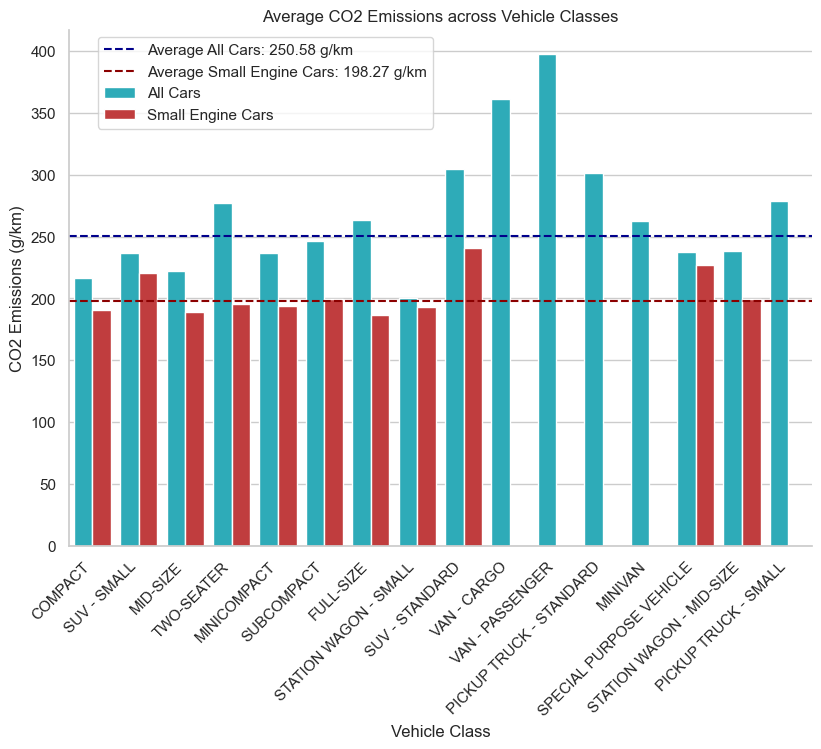

In [7]:
# Calculate the average CO2 emissions for all cars
avg_emissions_all = cars['CO2 Emissions(g/km)'].mean()

# Filtering data by engine size
small_engine_cars = cars[cars['Engine Size(L)'] <= 2.0]

# Calculate the average CO2 emissions for small engine cars
avg_emissions_small = small_engine_cars['CO2 Emissions(g/km)'].mean()

# Concatenate the two DataFrames for plotting
all_and_small_cars = pd.concat([cars.assign(Group='All Cars'), small_engine_cars.assign(Group='Small Engine Cars')])

# Create the CatPlot
g = sns.catplot(x='Vehicle Class', y='CO2 Emissions(g/km)', hue='Group', data=all_and_small_cars,
                kind='bar', ci=None, palette={'All Cars': '#17becf', 'Small Engine Cars': '#d62728'},
                height=6, aspect=1.5, legend=False)

# Adding average lines for all cars and small engine cars with explanations in the default legend
g.ax.axhline(y=avg_emissions_all, color='darkblue', linestyle='--', label=f'Average All Cars: {avg_emissions_all:.2f} g/km')
g.ax.axhline(y=avg_emissions_small, color='darkred', linestyle='--', label=f'Average Small Engine Cars: {avg_emissions_small:.2f} g/km')

# Set the plot titles and axis labels
plt.title('Average CO2 Emissions across Vehicle Classes')
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions (g/km)')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the custom and default legends
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1))

# Show the plot
plt.show()

6. Any other insights you found during your analysis?

Based on the data from the dataset used, Diesel (D) appears to have slightly higher CO2 emissions than regular gasoline (X), despite having a lower fuel consumption. It's important to note that these results are specific to the dataset and may not necessarily reflect the real-world behavior of all diesel and gasoline vehicles. Other factors, such as the make, model, and age of the vehicles, as well as driving conditions, can influence CO2 emissions and fuel consumption.

In [8]:
# Calculate the average CO2 emissions by fuel type
avg_emissions_fuel_type = cars.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().drop('N')

# Create a DataFrame with the fuel types and their average CO2 emissions
df_avg_emissions = pd.DataFrame({'Fuel Type': avg_emissions_fuel_type.index,
                                 'Average CO2 Emissions (g/km)': avg_emissions_fuel_type.values})

# Map the fuel type names using the fuel_type_names dictionary
df_avg_emissions['Fuel Type'] = df_avg_emissions['Fuel Type'].map(fuel_type_names)

# Sort the table by average CO2 emissions in descending order
df_avg_emissions = df_avg_emissions.sort_values('Average CO2 Emissions (g/km)', ascending=False)

# Reset the index of the DataFrame
df_avg_emissions.reset_index(drop=True, inplace=True)

# Display the table
df_avg_emissions

,Fuel Type,Average CO2 Emissions (g/km)
0,Ethanol,275.091892
1,Premium Gasoline,266.043410
2,Diesel,237.548571
3,Regular Gasoline,235.119329


## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

In [9]:
SELECT * 
FROM products;

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [10]:
SELECT * FROM brands;

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [11]:
SELECT * FROM categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


## 💪 Challenge II
Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?

1. What is the most expensive item your company sells? The least expensive?

- The "Trek Domane SLR 9 Disc - 2018" is the most expensive bike, with a list price of $11,999.99. This premium bicycle is known for its high-end features and exceptional performance, making it a top choice for enthusiasts seeking the ultimate riding experience.

<img src="images/trek-domane-slr-9-disc-bike.jpg" alt="trek-domane-slr-9-disc-bike" width="800">


- On the other end of the spectrum, the "Strider Classic 12 Balance Bike - 2018" stands as the most affordable option, with a list price of $89.99. This balance bike is designed to introduce young riders to cycling and provide a smooth transition to traditional pedal bikes.

<img src="images/strider-classic-12-balance-bike.jpg" alt="strider-classic-12-balance-bike" width="800">


In [12]:
-- Querying both most expensive and least expensive product
SELECT product_name, list_price, price_type
FROM
  (SELECT TOP 1 product_name, list_price, 'most_expensive' as price_type
  FROM products
  ORDER BY list_price DESC) subquery_max

UNION ALL

SELECT product_name, list_price, price_type
FROM
  (SELECT TOP 1 product_name, list_price, 'least_expensive' as price_type
  FROM products
  ORDER BY list_price ASC) subquery_min
ORDER BY price_type DESC;

,product_name,list_price,price_type
0,Trek Domane SLR 9 Disc - 2018,11999.99,most_expensive
1,Strider Classic 12 Balance Bike - 2018,89.99,least_expensive


2. How many different products of each category does your company sell?

The product inventory analysis reveals that Cruiser Bicycles and Mountain Bikes are the most prevalent categories, boasting the highest number of different products. On the other hand, Electric Bikes and Cyclocross Bicycles are comparatively less common, with a smaller variety of products available for these categories.

In [13]:
-- Number of different products
SELECT COUNT(product_id) AS products_per_category, category_name
FROM products AS p
JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY category_name
ORDER BY products_per_category DESC;

,products_per_category,category_name
0,78,Cruisers Bicycles
1,60,Mountain Bikes
2,60,Road Bikes
3,59,Children Bicycles
4,30,Comfort Bicycles
5,24,Electric Bikes
6,10,Cyclocross Bicycles


3. What are the top three brands with the highest average list price? The top three categories?

Upon analyzing the data, we found that the top three brands with the highest average list price are Trek, Heller, and Surly. These brands showcase premium products and tend to command higher prices in the market.

In terms of categories, the top three with the highest average listing price are Electric Bikes, Road Bikes, and Cyclocross Bicycles. These categories offer specialized and sought-after bicycles, reflecting the demand for high-quality and performance-oriented products.

In [14]:
-- Top 3 highest average list price Brands
SELECT TOP 3 AVG(list_price) AS avg_list_price, brand_name
FROM products AS p
INNER JOIN brands AS b
ON p.brand_id = b.brand_id
GROUP BY brand_name
ORDER BY avg_list_price DESC ;

,avg_list_price,brand_name
0,2500.064074,Trek
1,2172.996666,Heller
2,1331.753600,Surly


In [15]:
-- Top 3 highest average list price Categories
SELECT TOP 3 AVG(list_price) AS avg_list_price, category_name
FROM products AS p
INNER JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY category_name
ORDER BY avg_list_price DESC;

,avg_list_price,category_name
0,3281.656666,Electric Bikes
1,3175.357333,Road Bikes
2,2542.793000,Cyclocross Bicycles


## References
1. Image Source: [Trek Domane SLR 9 Disc - 2018](https://racing.trekbikes.com/wp-content/uploads/2018/12/Kramon_Trek_SicilyTraining_dec2019_01450-scaled-1600x800-c-center.jpg?x60432)
2. Image Source: [Strider 12 Classic Balance Bike - 2018](https://images.buyr.com/eVGg90rlOSoParV0EDcCaQ.jpg) 